# Agglomerative Hierarchical Clustering


Agglomerative Hierarchical Clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. It is an example of a bottom-up approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

Steps Involved in Agglomerative Hierarchical Clustering
1. **Initialize Clusters**: Start with each data point as its own cluster.
2. **Compute Proximity Matrix**: Compute a proximity matrix that stores the distances between each pair of clusters.
3. **Merge Clusters**: Find the closest pair of clusters and merge them into a single cluster.
4. **Update Proximity Matrix**: Update the proximity matrix to reflect the distances between the new cluster and the remaining clusters.
5. **Repeat**: Repeat steps 3 and 4 until all points are merged into a single cluster or the desired number of clusters is achieved.


**Linkage Criteria**

The linkage criteria determine the distance between sets of observations as a function of the pairwise distances between observations:

- Single Linkage: The minimum distance between observations of the two clusters.
- Complete Linkage: The maximum distance between observations of the two clusters.
- Average Linkage: The average distance between observations of the two clusters.
- Ward’s Method: The variance of the merged clusters is minimized.

#### Example and Implementation

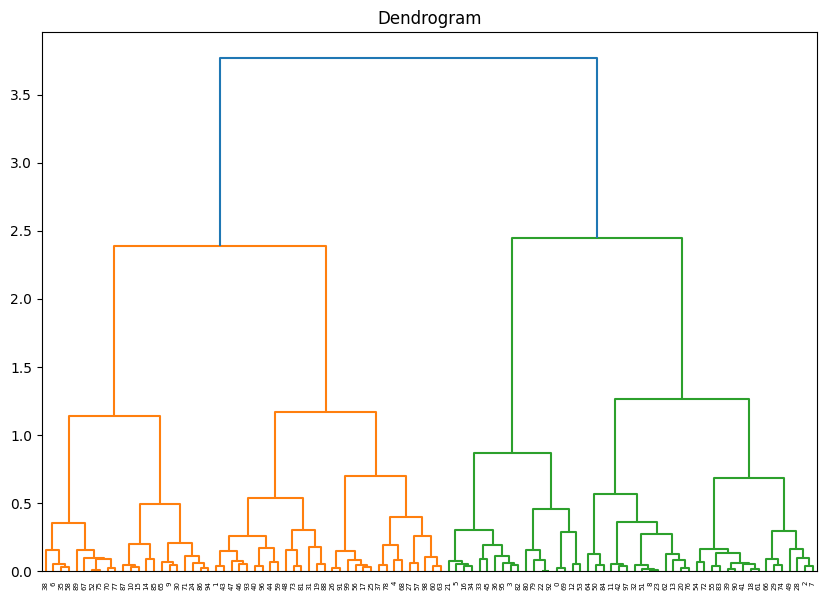

Silhouette Score: 0.38311318199749606


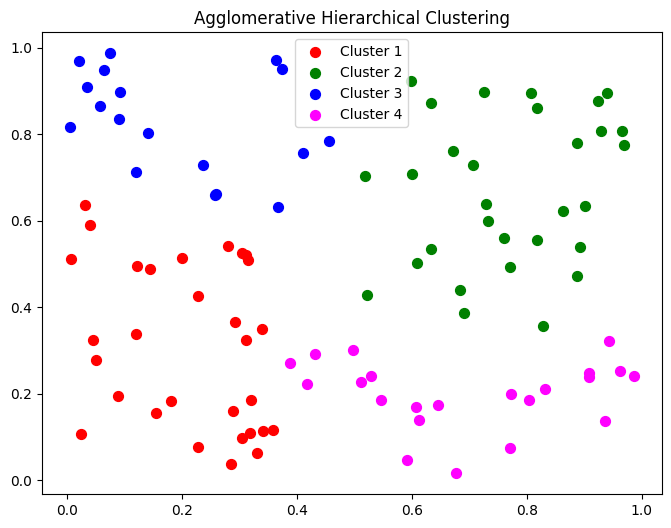

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Sample data
np.random.seed(42)
X = np.random.rand(100, 2)

# Compute the linkage matrix
Z = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.show()

# Fit the model
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = model.fit_predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Plot clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'magenta']
for i in range(4):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

plt.title('Agglomerative Hierarchical Clustering')
plt.legend()
plt.show()


Evaluation Metrics
1. **The silhouette score**: Measures how similar an object is to its own cluster compared to other clusters.

-Formula $s(i)$: 
$[ s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} ]$

    - $a(i) $ is the average distance between the sample $( i )$ and all other points in the same cluster.
    - $b(i) $ is the average distance between the sample $( i )$ and all points in the next nearest cluster.

- Interpretation
    - Close to +1: Data point is well clustered.
    - Around 0: Data point is on or very close to the decision boundary between two neighboring clusters.
    - Close to -1: Data point is likely assigned to the wrong cluster.

2. **Dendrogram**: A visual representation of the hierarchy of clusters.
- Interpretation:
    - The x-axis represents the individual data points.
    - The y-axis represents the distance or dissimilarity between clusters.
    - By cutting the dendrogram at different levels, you can decide the number of clusters.


3. **Inertia (Distortion)**: Sum of squared distances of samples to their closest cluster center (more relevant for KMeans).

The inertia (distortion) for clustering is calculated as:

$[ text{Inertia} = \sum_{i=1}^{n} \min_{c_j \in C} (||x_i - c_j||^2) ]$

where:
- $( x_i )$ is a data point.
- $( c_j )$ is a cluster center.
- $( C )$ is the set of all cluster centers.

- Interpretation : Lower values indicates a better clustering